In [1]:
import pandas as pd 
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\ML_PROJECT\Retail-Store-Customer-Segmentation\data\data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Data Cleaning and Feature Engineering

In [3]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [4]:
# Remove missing rows
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


##### Customer ID

In [5]:
# Converting customer ID into an integer
df["CustomerID"] = df["CustomerID"].astype(int)

##### Invoice Date

In [6]:
# Converting invoice date as a timestamp
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [7]:
df.insert(loc=2, column='year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.InvoiceDate.dt.month)
df.insert(loc=4, column='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.InvoiceDate.dt.hour)
df

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,12,5,12,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,201112,12,5,12,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,201112,12,5,12,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,201112,12,5,12,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


##### InvoiceNo

In [8]:
df[df["InvoiceNo"].str.startswith("C") == True].head(1)

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,201012,12,3,9,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom


In [9]:
# Removing data entries with invoice numbers having 'C', which indicates cancelled transactions
df["Cancelled"] = df["InvoiceNo"].str.startswith("C")
df["Cancelled"] = df["Cancelled"].fillna(False)
df = df[df["Cancelled"] == False]
df.drop("Cancelled", axis=1, inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('int')
df

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,12,5,12,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,201112,12,5,12,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,201112,12,5,12,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,201112,12,5,12,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


##### Description

In [10]:
# Utility function to plot Word Clouds to understand the distribution of items bought by customers
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=80, figure_size=(6,6), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
path = 'C:/Users/admin/Desktop/ML_project/Retail-Store-Customer-Segmentation/'


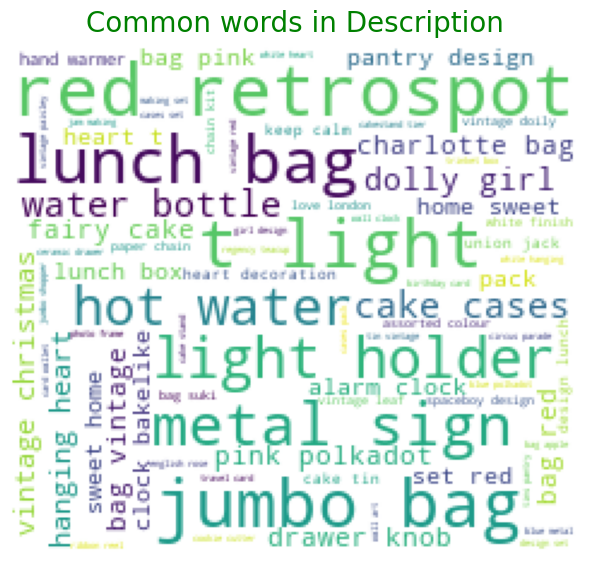

In [11]:
df['Description'] = df.Description.str.lower()
description = ' '.join(df['Description'])
description = str(description)
description_mask = np.array(Image.open(path + 'comment.png'))
plot_wordcloud(description, description_mask, max_words=400, max_font_size=80,title = 'Common words in Description')

In [12]:
# Removing data entries where the "Description" starts with a question mark or contains the word "LOST".
df = df[df["Description"].str.startswith("?") == False]
df = df[df["Description"].str.contains("LOST") == False]

##### stockcode

In [13]:
# Removing data entries have StockCode as DOT or POST and then removing the Stockcode column
df = df[(df["StockCode"] != "DOT") & (df["StockCode"] != "POST")]
df.drop("StockCode", inplace=True, axis=1)
df

,InvoiceNo,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,201112,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,201112,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,201112,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France


##### Quantity

In [14]:
# Only keeping data entries having quantity>0
df = df[df['Quantity'] > 0]
df

,InvoiceNo,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,201112,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,201112,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,201112,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France


#### Adding a column Total cost

In [15]:
# Adding a column TotalCost
# Calculating total price as the product of price of one unit and quantity
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,201112,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,201112,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,201112,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


##### Country

In [16]:
''' Encoding data entries in Country column into numerical ranks based on the mean total cost, 
with lower ranks indicating countries with lower mean total costs '''
best_buyer = df.groupby(["Country", "InvoiceNo"])["TotalCost"].sum().reset_index().groupby(["Country"])["TotalCost"].mean().sort_values()
encoder_countries = best_buyer.rank().to_dict()
decoder_countries = {i: j for i, j in encoder_countries.items()}

df["Country"]  = df["Country"].apply(lambda x:encoder_countries[x])
df

,InvoiceNo,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,10.0,15.30
1,536365,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,10.0,20.34
2,536365,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,10.0,22.00
3,536365,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,10.0,20.34
4,536365,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,10.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,14.0,10.20
541905,581587,201112,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,14.0,12.60
541906,581587,201112,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,14.0,16.60
541907,581587,201112,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,14.0,16.60


# Exploratory Data Analysis (EDA)

### No of orders made by the customers

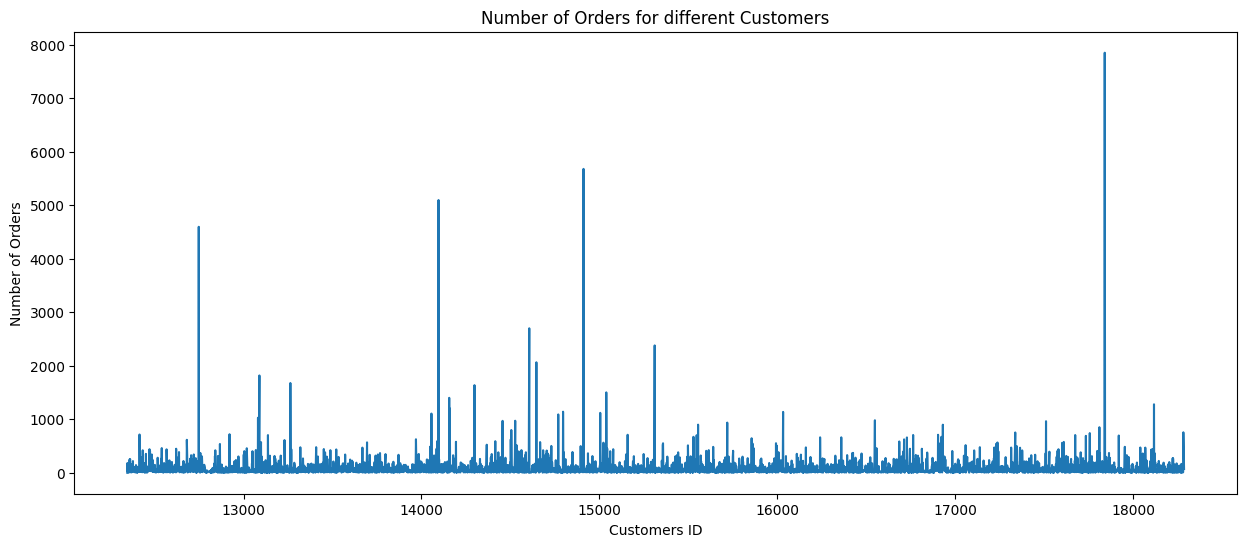

In [39]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

#### TOP 5 Customers with most number of orders

In [40]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,10.0,7847
1888,14911,28.0,5677
1298,14096,10.0,5095
334,12748,10.0,4595
1670,14606,10.0,2699


### Amount spent by the customers

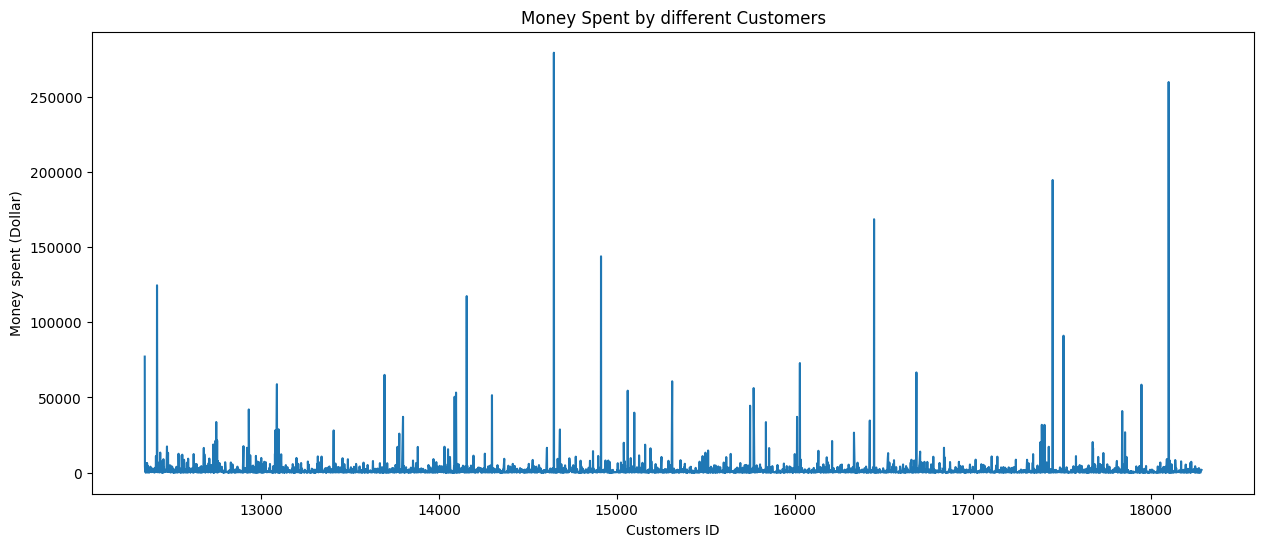

In [41]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['TotalCost'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalCost)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent by different Customers')
plt.show()

#### TOP 5 Customers with highest amount spent

In [42]:
money_spent.sort_values(by='TotalCost', ascending=False).head()

,CustomerID,Country,TotalCost
1698,14646,36.0,279138.02
4210,18102,10.0,259657.30
3737,17450,10.0,194550.79
3017,16446,10.0,168472.50
1888,14911,28.0,143825.06


### No of Orders per month

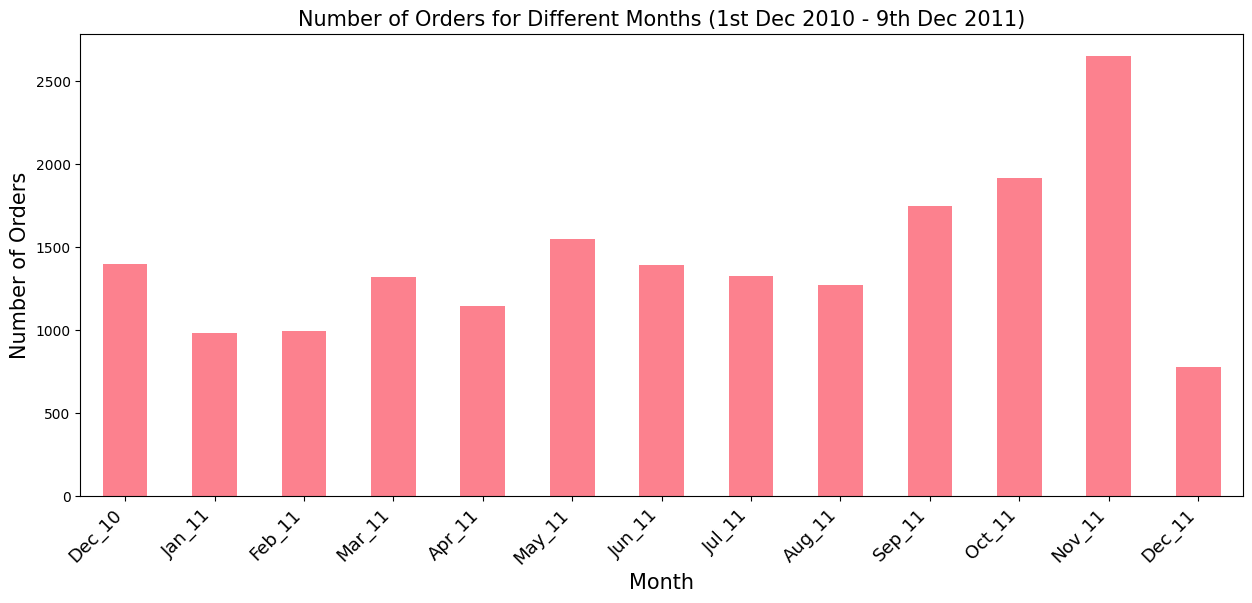

In [43]:
ax = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='#FC818E', figsize=(15, 6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(['Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'Jul_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11'], rotation=45, ha='right', fontsize=13)
plt.show()


### No of orders per day

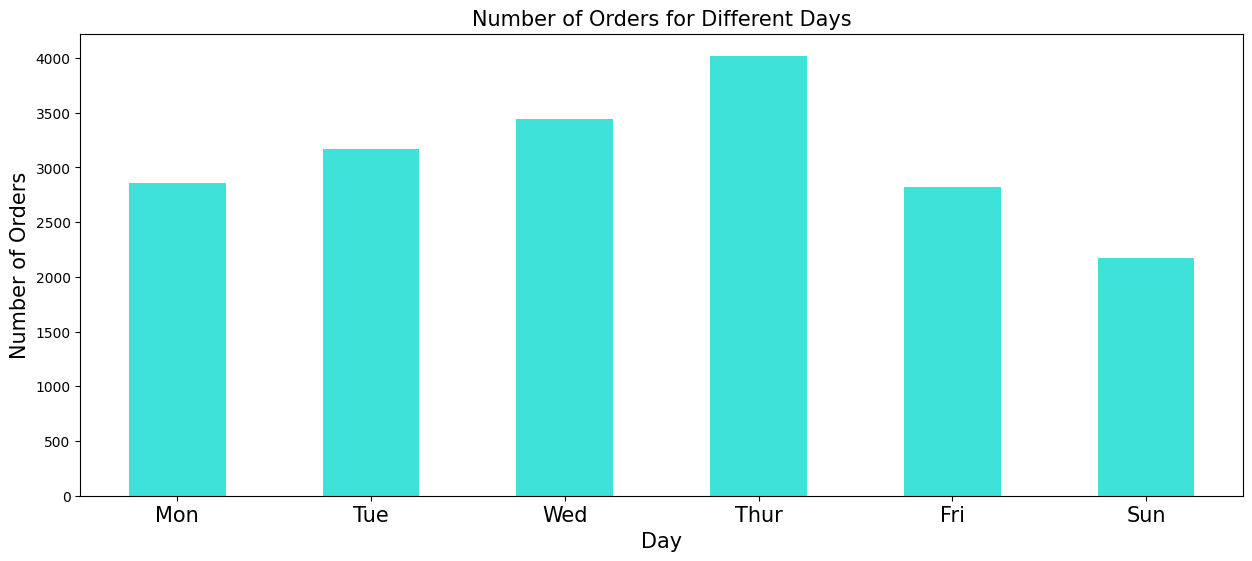

In [44]:
ax = df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar', color='#3FE2D8', figsize=(15, 6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Days', fontsize=15)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sun'], rotation=0, fontsize=15)  # Adjusted rotation for better visibility
plt.show()


 ### No of Orders per hour


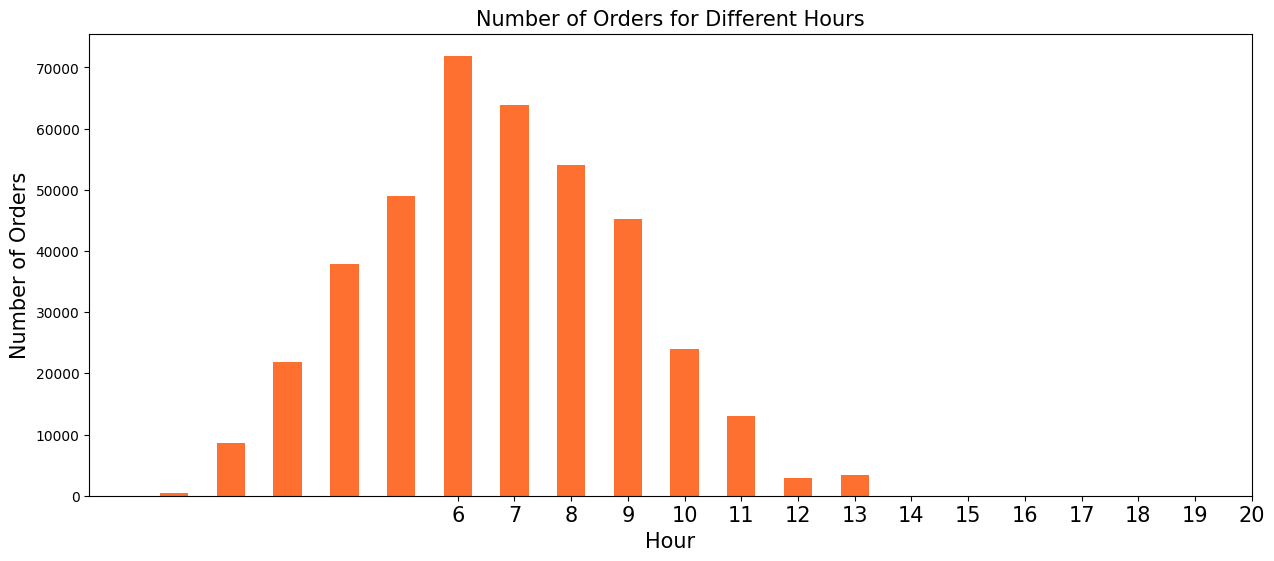

In [45]:
ax = df.groupby(['InvoiceNo', 'hour']).size().reset_index(name='count').groupby('hour')['count'].sum().iloc[:-1].sort_index().plot(kind='bar', color='#FD702F', figsize=(15, 6))

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Hours', fontsize=15)

# Set tick locations and labels
ax.set_xticks(range(6, 21))
ax.set_xticklabels(range(6, 21), rotation=0, fontsize=15)

plt.show()



In [46]:
df.UnitPrice.describe()

count    396809.000000
mean          3.007488
std          16.872377
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        4161.060000
Name: UnitPrice, dtype: float64

**Some items have unit price = 0 (FREE items)**

There are some free items given to customers from time to time.

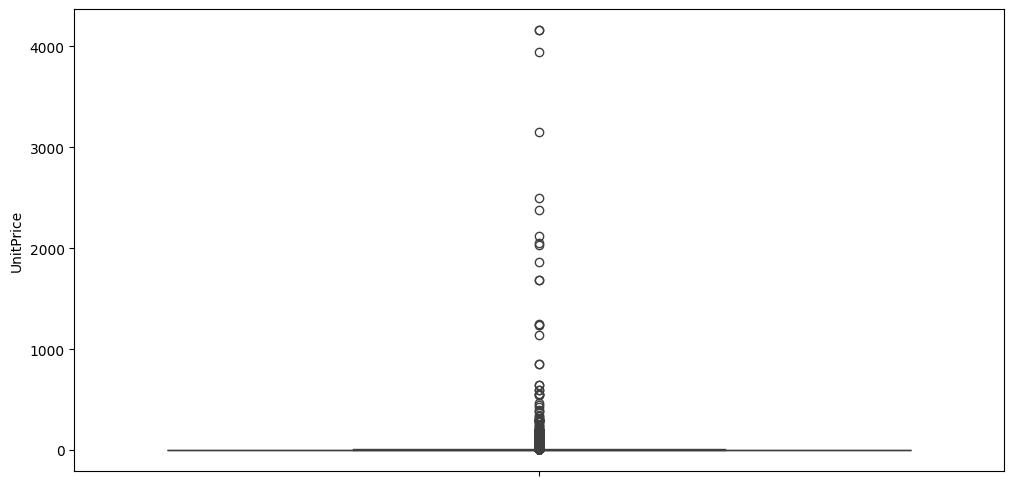

In [47]:
plt.subplots(figsize=(12,6))
sns.boxplot(df.UnitPrice)
plt.show()

In [48]:
df_free = df[df.UnitPrice == 0]

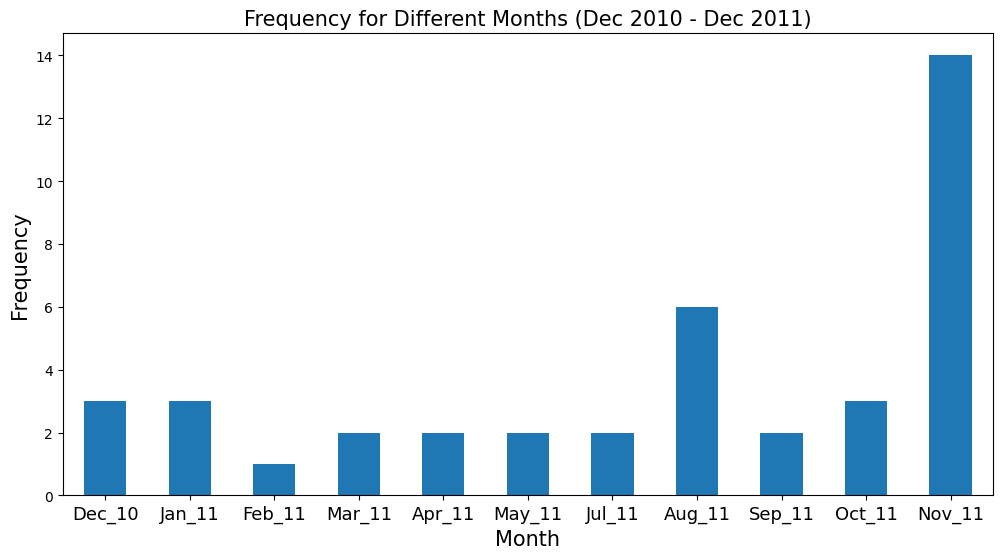

In [49]:
ax = df_free['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color=color[0])
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Frequency for Different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jul_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11'), rotation='horizontal', fontsize=13)
plt.show()


- On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

### No of orders by country

In [38]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Country wise Orders',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

### Countrywise Revenue

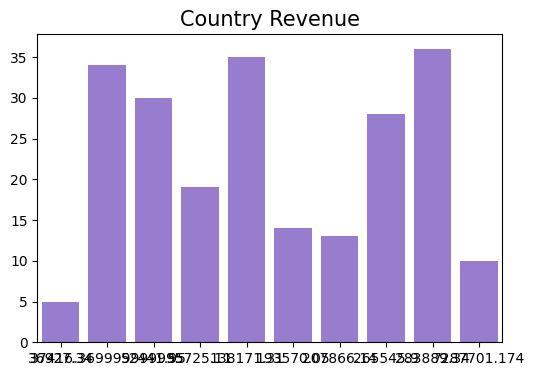

In [39]:
revenue_per_country = df.groupby(["Country"])["TotalCost"].sum().sort_values()
country_names = list(revenue_per_country.index)
country_names = country_names[-10:]
country_names = country_names[::-1]
revenue_per_country = list(revenue_per_country)
revenue_per_country = revenue_per_country[-10:]
revenue_per_country = revenue_per_country[::-1]
plt.figure(figsize=(6,4))
sns.set_color_codes("pastel")
plt.title('Country Revenue', fontsize = 15)
sns.barplot(x= revenue_per_country, y= country_names,color = '#9370db');

### Best Buying Country

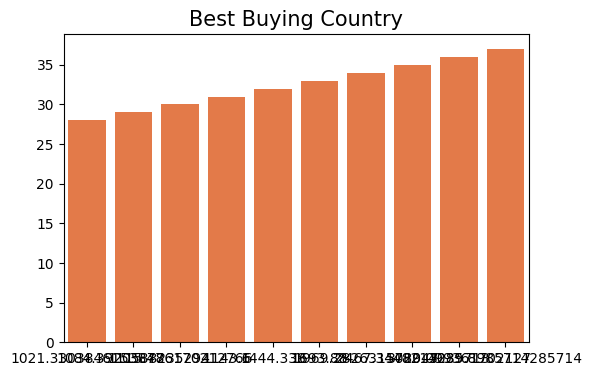

In [40]:
best_buyer = df.groupby(["Country", "InvoiceNo"])["TotalCost"].sum().reset_index().groupby(["Country"])["TotalCost"].mean().sort_values()

country_names = list(best_buyer.index)
country_names = country_names[-10:]
country_names = country_names[::-1]
best_buyer = list(best_buyer)
best_buyer = best_buyer[-10:]
best_buyer = best_buyer[::-1]
plt.figure(figsize=(6,4))
sns.set_color_codes("pastel")
plt.title('Best Buying Country', fontsize = 15)
sns.barplot(x= best_buyer, y= country_names,color = '#FD702F');